# Optical Character Recognition (OCR) in Python With Pytesseract

Master the fundamentals of optical character recognition in OCR with PyTesseract and OpenCV.

Source : https://www.datacamp.com/tutorial/optical-character-recognition-ocr-in-python-with-pytesseract

Pytesseract Documentation : https://tesseract-ocr.github.io/tessdoc/

## Why Learn Optical Character Recognition (OCR)?

Extracting text from images and documents manually can be very tedious and time-consuming. Fortunately, OCR (Optical Character Recognition) can automate this process, allowing you to convert those images into editable and searchable text files.

### The techniques you are about to learn can be applied in many applications:

- **Turning physical documents digital**: Convert scanned documents, PDFs, or photos of text into editable and searchable files.
- **Automating data entry** : Extract information from forms, invoices, receipts, and other documents to automatically populate databases or spreadsheets.
- **Improving accessibility** : Create digital text versions of books, menus, or signs for people with visual impairments. Text-to-speech tools can then be used to read the text aloud.
- **Self-driving cars** : Recognize traffic signs and license plates for safe navigation.

### What is Tesseract

Tesseract OCR is an open-source optical character recognition engine that is the most popular among developers. Tesseract can take images of text and convert them into editable text.

#### Advantages
- Widely used and mature library with a large community
- Supports over 100 languages
- Free and open-source

#### Disadvantages
- Accuracy can be lower compared to some deep learning-based solutions
- Limited configuration options

## A Step-By-Step Guide to OCR With PyTesseract & OpenCV


###  Installation
- For Windows
    - pip install pytesseract
    - pip install opencv-python
- For Linux
    - sudo apt update && sudo apt upgrade
    - sudo apt install tesseract-ocr
    - sudo apt install libtesseract-dev

#### In case of error in windows :

##### 1. Install Tesseract OCR  
Since you're on **Windows**, download and install Tesseract from:  
👉 [https://github.com/UB-Mannheim/tesseract/wiki](https://github.com/UB-Mannheim/tesseract/wiki)  

During installation, make sure to check **"Add Tesseract to PATH"** in the setup options.

##### 2. Verify Installation  
After installing, open **Command Prompt** and run:
```sh
tesseract --version
```
If you see the version info, Tesseract is installed correctly.

##### 3. Add Tesseract to PATH Manually (If Needed)  
If `tesseract --version` doesn’t work, manually add its path:

1. Find where Tesseract is installed. By default, it's usually in:  
   ```
   C:\Program Files\Tesseract-OCR
   ```
2. Copy the full path.
3. Open **System Environment Variables**:
   - Press `Win + R`, type `sysdm.cpl`, and press **Enter**.
   - Go to the **Advanced** tab → Click **Environment Variables**.
   - Under **System Variables**, find `Path`, click **Edit** → **New**.
   - Paste the Tesseract path (`C:\Program Files\Tesseract-OCR`).
   - Click **OK** → Restart your PC.

### 4. Set Tesseract Path in Python  
Even if it's in your system PATH, explicitly set the path in Python:

```python
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
```

In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from pytesseract import Output

In [2]:
def show_img(img):
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

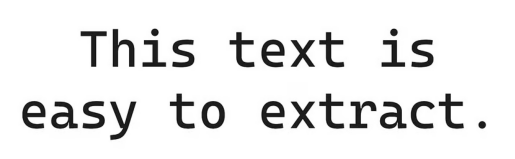

This text is
easy to extract.



In [3]:
# Set Tesseract Path
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Read image
easy_text_path = "imgs/easy_text.png"
easy_img = cv2.imread(easy_text_path)

show_img(easy_img)

# Convert to text
text = pytesseract.image_to_string(easy_img)
print(text)

## Create a function to extract text from image 

In [4]:
def image_to_text(input_path, show_image=False):
    """
    A function to read text from images.
    """
    img = cv2.imread(input_path)
    
    if show_image == True :
        show_img(img)
        
    text = pytesseract.image_to_string(img)

    return text.strip()

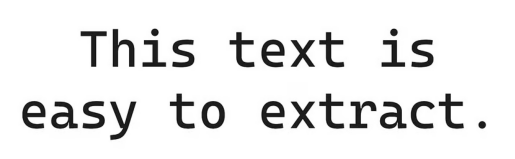

'This text is\neasy to extract.'

In [6]:
image_to_text("imgs/easy_text.png", show_image=True)

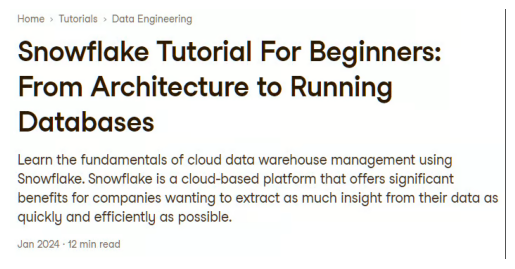

Home > Tutorials > Data Engineering

Snowflake Tutorial For Beginners:
From Architecture to Running
Databases

Learn the fundamentals of cloud data warehouse management using
Snowflake. Snowflake is a cloud-based platform that offers significant
benefits for companies wanting to extract as much insight from their data as
quickly and efficiently as possible.

Jan 2024 - 12 min read


In [7]:
medium_text_path = "imgs/medium_text.png"
extracted_text = image_to_text(medium_text_path, show_image=True)
print(extracted_text)

### Drawing bounding boxes around text

In [8]:
data = pytesseract.image_to_data(easy_img, output_type=Output.DICT)
data

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2, 3],
 'left': [0, 20, 20, 114, 114, 354, 599, 20, 20, 258, 406],
 'top': [0, 32, 32, 32, 32, 37, 32, 136, 148, 136, 136],
 'width': [800, 748, 748, 569, 183, 185, 84, 748, 184, 88, 362],
 'height': [225, 178, 178, 62, 62, 57, 62, 74, 62, 56, 56],
 'conf': [-1, -1, -1, -1, 95, 95, 95, -1, 96, 95, 95],
 'text': ['', '', '', '', 'This', 'text', 'is', '', 'easy', 'to', 'extract.']}

In [9]:
# Extract recognized data
data = pytesseract.image_to_data(easy_img, output_type=Output.DICT)
n_boxes = len(data["text"])

for i in range(n_boxes):
    if data["conf"][i] == -1:
        continue
    # Coordinates
    x, y = data["left"][i], data["top"][i]
    w, h = data["width"][i], data["height"][i]

    # Corners
    top_left = (x, y)
    bottom_right = (x + w, y + h)

    # Box params
    green = (0, 255, 0)
    thickness = 3  # pixels

    cv2.rectangle(
       img=easy_img, pt1=top_left, pt2=bottom_right, color=green, thickness=thickness
    )
    
# Save the image
output_image_path = "imgs/text_with_boxes.jpg"
cv2.imwrite(output_image_path, easy_img)

True

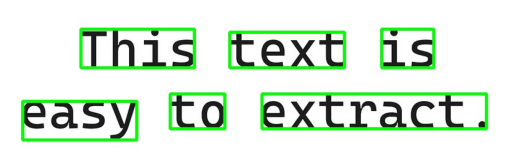

In [10]:
output_image_path = "imgs/text_with_boxes.jpg"
output_image = cv2.imread(output_image_path)
show_img(output_image)

## define a function for Drawing bounding boxes around text

In [12]:
def draw_bounding_boxes(input_img_path, output_path):
    img = cv2.imread(input_img_path)

    # Extract data
    data = pytesseract.image_to_data(img, output_type=Output.DICT)
    n_boxes = len(data["text"])

    for i in range(n_boxes):
        if data["conf"][i] == -1:
            continue
        # Coordinates
        x, y = data["left"][i], data["top"][i]
        w, h = data["width"][i], data["height"][i]

        # Corners
        top_left = (x, y)
        bottom_right = (x + w, y + h)

        # Box params
        green = (0, 255, 0)
        thickness = 1  # The function-version uses thinner lines

        cv2.rectangle(img, top_left, bottom_right, green, thickness)

    # Save the image with boxes
    cv2.imwrite(output_path, img)

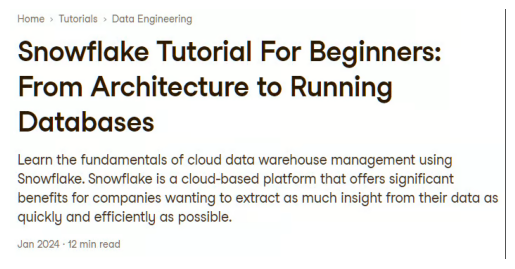

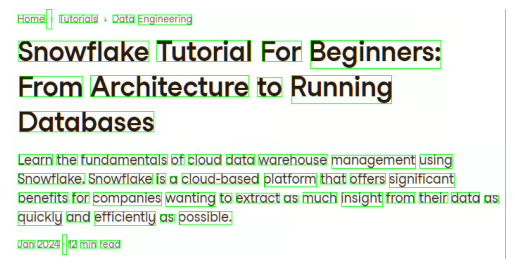

In [13]:
input_image_path = "imgs/medium_text.png"
output_image_path = "imgs/medium_text_with_boxes.png"
input_image = cv2.imread(input_image_path)
output_image = cv2.imread(output_image_path)
show_img(input_image)
draw_bounding_boxes(input_image_path, output_image_path)
show_img(output_image)

# OCR For PDF : 

The next step is installing the pdf2image library, which requires PDF processing software called Poppler. Here are platform-specific instructions:

- For linux
    - sudo apt-get install -y poppler-utils
    - pip install pdf2image
    
- For Windows, folow this : https://pdf2image.readthedocs.io/en/latest/installation.html#windows
    - and install : `pip install pdf2image`

In [14]:
import pathlib
from pathlib import Path
from pdf2image import convert_from_path
import os
import numpy as np

The convert_from_path function converts a given PDF to a series of images. Here is a function that saves each page of a PDF file as an image to a given directory:

In [15]:
def pdf_to_image(pdf_path, output_folder: str = "imgs/documents"):
    """
    A function to convert PDF files to images
    """
    # Create the output folder if it doesn't exist
    if not Path(output_folder).exists():
        Path(output_folder).mkdir()

    pages = convert_from_path(pdf_path, output_folder=output_folder, fmt="png")

    return pages

In [18]:
pdf_path = "pdfs/scanned_document.pdf"
pdf_to_image(pdf_path, output_folder="pdfs/output_pdf2imgs")

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1662x2341>]

The output is a list containing a single image PngImageFile object

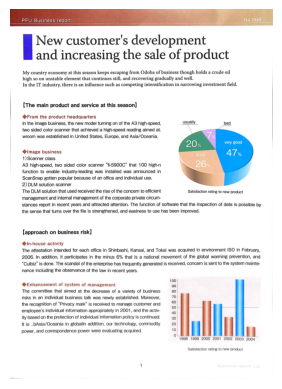

PFU Business report

New customer's development
and increasing the sale of product

My country economy at this season keeps escaping from Odoba of business though holds a crude oil
high so on unstable element that continues still, and recovering gradually and well.
In the IT industry, there is an influence such as competing intensification in narrowing investment field.

[The main product and service at this season)

From the product headquarters
In the image business, the new model turning on of the A3 high-speed, usually _ _bad
two sided color scanner that achieved a high-speed reading aimed at.
wroom was established in United States, Europe, and Asia/Oceania.

Image business

1) Scanner class

A3 high-speed, two sided color scanner "fi-5900C" that 100 high-n
function to enable industry-leading was installed was announced in
ScanSnap gotten popular because of an office and individual use.

2) DLM solution scanner iid
The DLM solution that used received the rise of the concern to effi

In [20]:
scanned_img_path = "pdfs/output_pdf2imgs/a2e7c981-119b-408d-9261-6ed64a5393de-1.png"
print(image_to_text(scanned_img_path, show_image=True))

In [22]:
scanned_img_path = "pdfs/output_pdf2imgs/a2e7c981-119b-408d-9261-6ed64a5393de-1.png"

raw_pdf = pytesseract.image_to_pdf_or_hocr(scanned_img_path)

with open("pdfs/searchable_pdf.pdf", "w+b") as f:
    f.write(bytearray(raw_pdf))

#### Other example for PDF with many page :

In [23]:
pdf_path = "pdfs/research-paper.pdf"
pages_num = pdf_to_image(pdf_path, output_folder="pdfs/output_pdf2imgs_research-paper")

In [24]:
len(pages_num)

5

Processing: pdfs/output_pdf2imgs_research-paper\815b769e-b7c6-4c65-aa9c-6ea2f4ee3bf3-1.png


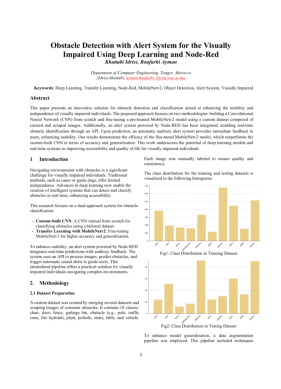

Obstacle Detection with Alert System for the Visually

Impaired Using Deep Learning and Node-Red
Khattabi Idriss, Boufarhi Ayman

Department of Computer Engineering, Tanger, Morocco
{driss.khattabi, ayman.boufarhi }(@etu.uae.ac.ma

Keywords: Deep Learning, Transfer Learning, Node-Red, MobileNetv2, Object Detection, Alert System, Visually Impaired
Abstract

This paper presents an innovative solution for obstacle detection and classification aimed at enhancing the mobility and
independence of visually impaired individuals. The proposed approach focuses on two methodologies: building a Convolutional
Neural Network (CNN) from scratch and fine-tuning a pre-trained MobileNetv2 model using a custom dataset composed of
curated and scraped images. Additionally, an alert system powered by Node-RED has been integrated, enabling real-time
obstacle identification through an API. Upon prediction, an automatic auditory alert system provides immediate feedback to
users, enhancing usability. Our result

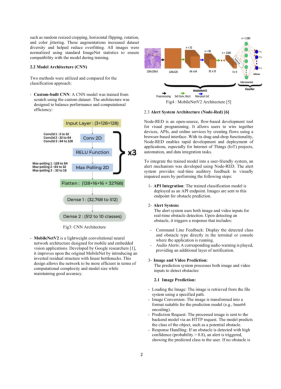

such as random resized cropping, horizontal flipping, rotation,
and color jittering. These augmentations increased dataset
diversity and helped reduce overfitting. All images were
normalized using standard ImageNet statistics to ensure

compatibility with the model during training.

2.2 Model Architecture (CNN)

Two methods were utilized and compared for the
classification approach:

- Custom-built CNN: A CNN model was trained from
scratch using the custom dataset. The architecture was
designed to balance performance and computational
efficiency:

Conv2d 1:3 to 32

Conv2d 2: 32 to 64 Conv 2D
Conv2d 3: 64 to 128

RELU Function x3

Max-polling 1: 128 to 64

Max-polling 2 : 64 to 32 j
Max-polling 3 :32to16 Max Polling 2D

Flatten: (128x16*16 = 32768)

Dense 1: (32,768 to 512)

Dense 2: (512 to 10 classes)
Fig3: CNN Architecture

- MobileNetV2 is a lightweight convolutional neural
network architecture designed for mobile and embedded
vision applications. Developed by Google researchers [1]

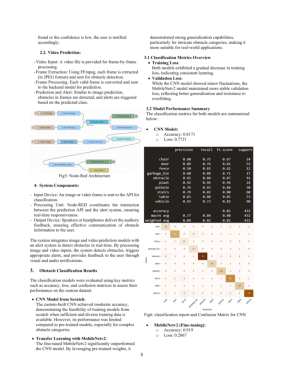

found or the confidence is low, the user is notified demonstrated strong generalization capabilities,
accordingly. particularly for intricate obstacle categories, making it
more suitable for real-world applications.
2.2. Video Prediction:
3.1 Classification Metrics Overview

- Video Input: A video file is provided for frame-by-frame ¢ Training Loss:
processing. Both models exhibited a gradual decrease in training
- Frame Extraction: Using FFmpeg, each frame is extracted loss, indicating consistent learning.
(in JPEG format) and sent for obstacle detection. e Validation Loss:
- Frame Processing: Each valid frame is converted and sent While the CNN model showed minor fluctuations, the
to the backend model for prediction. . MobileNetv2 model maintained more stable validation
-Prediction and Alert: Similar to image prediction, loss, reflecting better generalization and resistance to
obstacles in frames are detected, and alerts are triggered overfitting.

based on the predicted class.

3.2 

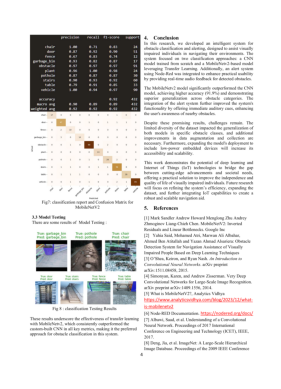

precision recall f1-score support

chair

door

fence
garbage bin
obstacle
plant

-00
-87
-67
-93
-97
-96
-87
-98
-79
-08

-71
-92
-83
-82
-97
A)
-87
-93
-91
-94

-83
-90
-74
-87
-97
-98
-87
-92
-85
-97

24
51
12
17
91
24
30
68

pothole
stairs
table
vehicle

S2STTHFOOOOSD

accuracy
macro avg
weighted avg

po2
-89

chair -

om °

°

v °

fence - 2

garbage_bin- 0 3

obstacle- 0 ° 1

Actual

plant- 0

pothole- 0

stairs -
table- 0 1 1 1
vehicle -

&

Ss

a

Predicted
Fig7: classification report and Confusion Matrix for
MobileNetV2

3.3 Model Testing
There are some results of Model Testing :

True: chair
Pred: chair

True: garbage_bin
Pred: garbage_bin

True: pothole
Pred: pothole

True: door
Pred: door

True: table
Pred: table

True: fence
Pred: fence

True: stairs
Pred: stairs

Fig 8 : classification Testing Results

These results underscore the effectiveness of transfer learning
with MobileNetv2, which consistently outperformed the
custom-built CNN in all key metrics, making it the pre

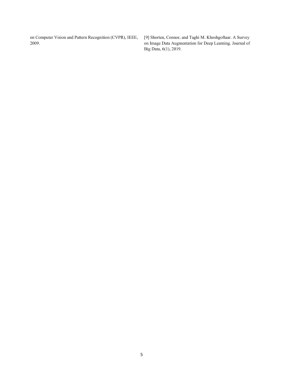

on Computer Vision and Pattern Recognition (CVPR), IEEE, [9] Shorten, Connor, and Taghi M. Khoshgoftaar. A Survey
2009. on Image Data Augmentation for Deep Learning. Journal of
Big Data, 6(1), 2019.
--------------------------------------------------


In [25]:
img_folder = "pdfs/output_pdf2imgs_research-paper"

# Get all image files in the folder
img_files = sorted([f for f in os.listdir(img_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Process each image
for img_file in img_files:
    img_path = os.path.join(img_folder, img_file)
    print(f"Processing: {img_path}")
    print(image_to_text(img_path, show_image=True))
    print("-" * 50)

#### Other example for PDF with table :

In [26]:
pdf_path = "pdfs/foo.pdf"
pages_num = pdf_to_image(pdf_path, output_folder="pdfs/output_pdf2imgs_foo")

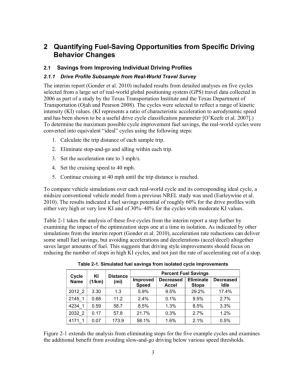

2 Quantifying Fuel-Saving Opportunities from Specific Driving
Behavior Changes

2.1 Savings from Improving Individual Driving Profiles
2.1.1. Drive Profile Subsample from Real-World Travel Survey

The interim report (Gonder et al. 2010) included results from detailed analyses on five cycles
selected from a large set of real-world global positioning system (GPS) travel data collected in
2006 as part of a study by the Texas Transportation Institute and the Texas Department of
Transportation (Ojah and Pearson 2008). The cycles were selected to reflect a range of kinetic
intensity (KI) values. (KI represents a ratio of characteristic acceleration to aerodynamic speed
and has been shown to be a useful drive cycle classification parameter [O’ Keefe et al. 2007].)
To determine the maximum possible cycle improvement fuel savings, the real-world cycles were
converted into equivalent “ideal” cycles using the following steps:

1. Calculate the trip distance of each sample trip.

Eliminate stop-an

In [28]:
scanned_img_path = "pdfs/output_pdf2imgs_foo/4d1a54ab-9d41-4c26-bb69-6772ab81e4fd-1.png"
print(image_to_text(scanned_img_path, show_image=True))

----
## Image Preprocessing Techniques For OCR in OpenCV

There is no one-size-fits-all approach for OCR. The techniques we’ve covered today may not work with other types of images. I recommend that you experiment with different image preprocessing techniques and Tesseract configurations to find the optimal settings for specific images.

The most important factor in OCR is image quality. Properly scanned, fully vertical, and high-contrast (black and white) images tend to work best with any OCR software. Remember, just because you can read the text doesn’t mean your computer can.

If your images don’t satisfy the high quality standards of Tesseract and the output is gibberish, then there are some preprocessing steps you can perform.

### 1. Grayscale conversion
First, start with converting colored images to grayscale. This can improve accuracy by removing color variations that might confuse the recognition process. In OpenCV, this will look like this:

In [29]:
def grayscale(image):
    """Converts an image to grayscale."""
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### 2. Noise reduction
Not all images, especially scanned documents, come with pristine, uniform backgrounds. Also, some images might be from old documents where the pages deteriorated due to age. Here is an example:

![image.png](imgs/noise.png)

Apply techniques like denoising filters (e.g., median blur) to reduce noise artifacts in the image that can lead to misinterpretations during OCR. In OpenCV, you can use the medianBlur function:

In [35]:
def denoise(image):
    """Reduces noise in the image using a median blur filter."""
    return cv2.medianBlur(image, 1)  # Adjust kernel size as needed

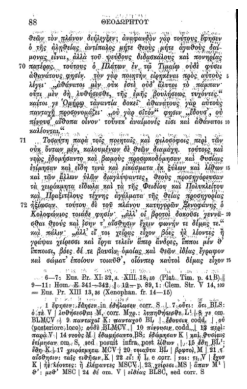

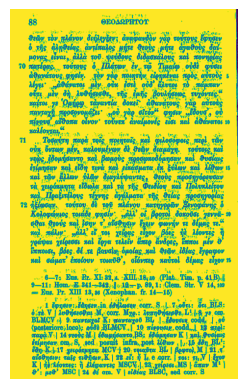

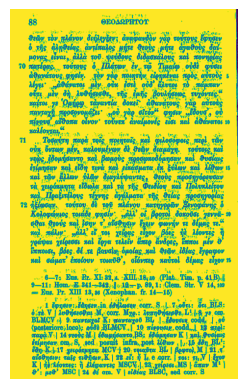

In [40]:
img_path = 'imgs/noise.png'
img = cv2.imread(img_path)
show_img(img)
gray_img = grayscale(img)
show_img(gray_img)

# apply Binarization
denoised_img = denoise(gray_img)
show_img(denoised_img)

### 3. Sharpening
In some cases, sharpening the image can enhance edges and improve character recognition, especially for blurry or low-resolution images. Sharpening can be performed by applying a Laplacian filter in OpenCV:

In [17]:
def sharpen(image):
    """Sharpens the image using a Laplacian filter.
   Args:
       image: The input grayscale image.
   Returns:
       The sharpened image (be cautious with sharpening).
   """
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

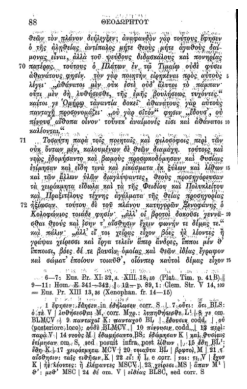

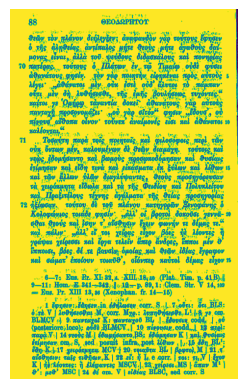

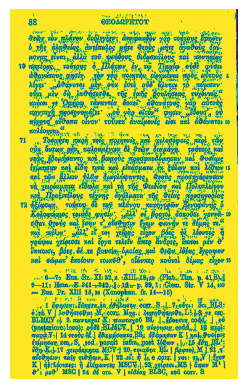

In [41]:
img_path = 'imgs/noise.png'
img = cv2.imread(img_path)
show_img(img)
gray_img = grayscale(img)
show_img(gray_img)

# apply Binarization
sharpened_img = sharpen(gray_img)
show_img(sharpened_img)

### 4. Binarization
For certain images, binarization (converting the image to black and white) might be beneficial. Experiment with different thresholding techniques to find the optimal separation between foreground (text) and background.

However, binarization can be sensitive to variations in lighting and might not always be necessary. Here is an example of what a binarized image looks like:

![](imgs/Binarization-example.png)

To perform binarization in OpenCV, you can use the adaptiveThreshold function:

In [18]:
def binarize(image):
    """Binarizes the image using adaptive thresholding.

   Args:
       image: The input grayscale image.

   Returns:
       The binary image.
   """
    thresh = cv2.adaptiveThreshold(
       image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
   )

    return thresh

apply an example :

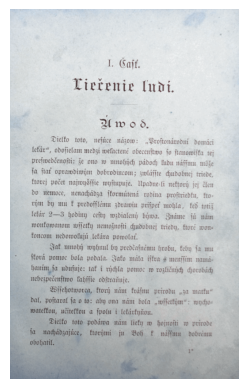

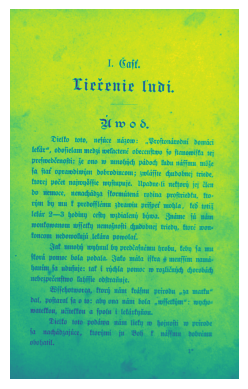

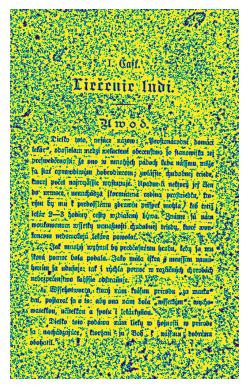

In [42]:
img_path = 'imgs/not-binarized-img.png'
img = cv2.imread(img_path)
show_img(img)
gray_img = grayscale(img)
show_img(gray_img)

# apply Binarization
binarized_img = binarize(gray_img)
show_img(binarized_img)

### 5. Other techniques
There are many other preprocessing techniques, such as:

- Dilation: making small and thin fonts bolder to improve recognition
- Erosion: eroding bold text to improve accuracy. Common in historic documents with thick fonts.
- Canny edge detection
- Skew correction: correcting the tilt (skewness) of text lines. Common in incorrectly scanned documents

You can learn more about image quality improvements from this [page of Tesseract documentation](https://tesseract-ocr.github.io/tessdoc/ImproveQuality).

## Conclusion
In this article, you’ve taken the first steps to learn about the dynamic problem that is OCR. We first covered how to extract text from simple images, then moved on to more difficult images with complex formatting.

We’ve also learned an end-to-end workflow to extract text from scanned PDFs and how to save extracted text as a PDF again so that it becomes searchable. We’ve capped off the article with some tips to improve image quality with OpenCV before feeding it to Tesseract.

If you want to learn more about solving image-related problems, here are some computer vision resources for you to check out: